In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

In [3]:
column_names = ['wavelength', 'h2o_ionization', 'ohp_ionization',
                'hp_ionization', 'op_ionization', 'photo_absorbtion']
h2o_df = pd.read_csv("./photo_cross_section_H2O.txt", sep=r"\s+",
                     skiprows=10, skipfooter=1, header=None,
                     names=column_names)

/home/fnovotny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


Text(0.5, 0, 'Wavelength (nm)')

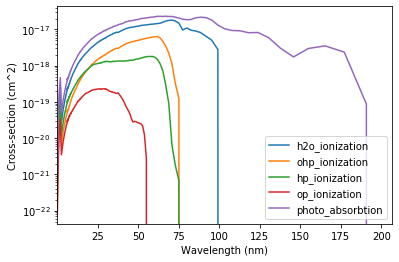

In [4]:
h2o_df.plot(x="wavelength")
plt.ylabel("Cross-section (cm^2)")
plt.yscale("log")
plt.xlabel("Wavelength (nm)")

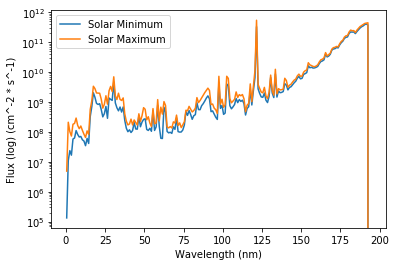

In [5]:
from data_helpers import load_solar_dataframe

min_file = "./timed_see_F107_70_15May2008_1AU.txt"
max_file = "./timed_see_F107_180_20Oct2002_1AU.txt"

solar_min = load_solar_dataframe(min_file)
solar_max = load_solar_dataframe(max_file)

plt.plot(solar_min.mid_wavelength, solar_min.flux, label="Solar Minimum")
plt.plot(solar_max.mid_wavelength, solar_max.flux, label="Solar Maximum")
plt.yscale("Log")
plt.ylabel("Flux (log) (cm^-2 * s^-1)")
plt.xlabel("Wavelength (nm)")
plt.legend()
plt.show()

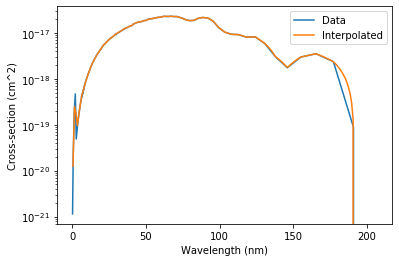

4:80: E501 line too long (81 > 79 characters)
6:80: E501 line too long (94 > 79 characters)


In [6]:
from scipy import interpolate

# interpolating the photoabsorbtion wavelength dependance
sigma_f_values = interpolate.interp1d(h2o_df.wavelength, h2o_df.photo_absorbtion)
# getting the values fro flux wavelenth
sigma_f = sigma_f_values(solar_min.mid_wavelength)  # interpolated sigma from min. flux lambda

plt.plot(h2o_df.wavelength, h2o_df.photo_absorbtion, label="Data")
plt.plot(solar_min.mid_wavelength, sigma_f, label="Interpolated")
plt.yscale("Log")
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Cross-section (cm^2)")
plt.show()

## Number density

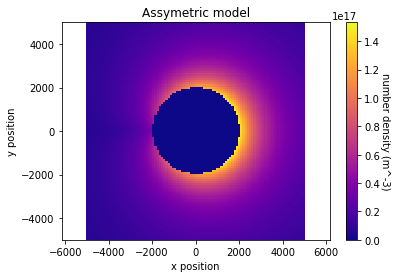

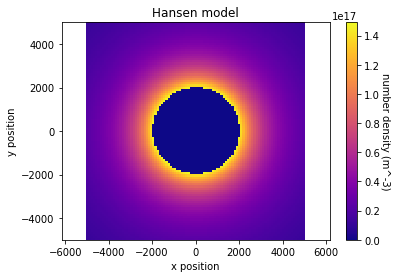

13:1: E302 expected 2 blank lines, found 0
14:1: W293 blank line contains whitespace
21:80: E501 line too long (82 > 79 characters)
24:1: W293 blank line contains whitespace
25:1: E305 expected 2 blank lines after class or function definition, found 1
27:80: E501 line too long (86 > 79 characters)


In [7]:
# Asymmetrical number density
import scipy as sp
from Coma import Coma
from Coma_visualizer import Coma_visualizer

total_output = 6e27
cos_scale = 3
neutral_velocity = 800
coma = Coma(total_output, cos_scale, neutral_velocity)
coma_visualizer = Coma_visualizer(coma, 100, 5000, solar_min, h2o_df, 0)
x = coma_visualizer.x_axis
y = coma_visualizer.y_axis
def visualize_n_density(coma_visualizer, title):
   
    n_density = coma_visualizer.neutral_number_density
    plt.pcolormesh(x, y, (n_density), cmap='plasma')
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.title(title)
    colourbar = plt.colorbar()
    colourbar.set_label('number density (m^-3)', labelpad=10, y=0.5, rotation=270)
    plt.axis('equal')
    plt.show()
    
visualize_n_density(coma_visualizer, "Assymetric model")
hansen_coma = Coma(total_output, 0, neutral_velocity)
coma_visualizer_hansen = Coma_visualizer(hansen_coma, 100, 5000, solar_min, h2o_df, 0)
visualize_n_density(coma_visualizer_hansen, "Hansen model")

## Column density

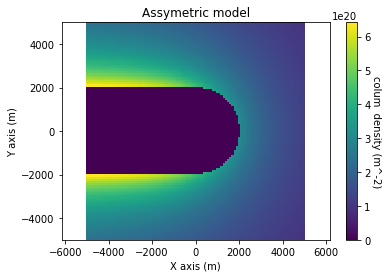

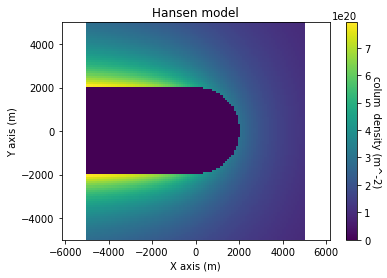

2:1: E302 expected 2 blank lines, found 0
8:80: E501 line too long (82 > 79 characters)
12:1: E305 expected 2 blank lines after class or function definition, found 0


In [8]:
import matplotlib.colors as colors
def visualize_c_density(coma_visualizer, title):
    column_density = coma_visualizer.column_density
    plt.pcolormesh(x, y, column_density)
    plt.ylabel("Y axis (m)")
    plt.xlabel("X axis (m)")
    colourbar = plt.colorbar()
    colourbar.set_label('colum  density (m^-2)', labelpad=10, y=0.5, rotation=270)
    plt.axis('equal')
    plt.title(title)
    plt.show()
visualize_c_density(coma_visualizer, 'Assymetric model')
visualize_c_density(coma_visualizer_hansen, 'Hansen model')

## Optical depth

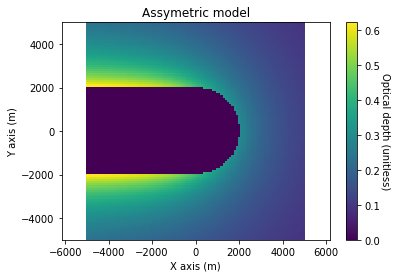

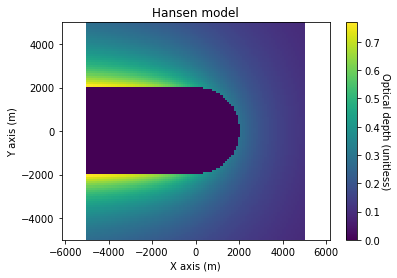

4:1: E302 expected 2 blank lines, found 0
11:80: E501 line too long (85 > 79 characters)
15:1: E305 expected 2 blank lines after class or function definition, found 0


In [9]:
# terminator plane - solar zenith angle is 90 deg

wavelength = [30.4]
def visualize_optical_d(coma_visualizer, title):
    optical_depth = coma_visualizer.optical_depth(wavelength)

    plt.pcolormesh(x, y, optical_depth)
    plt.ylabel("Y axis (m)")
    plt.xlabel("X axis (m)")
    colourbar = plt.colorbar()
    colourbar.set_label('Optical depth (unitless)', labelpad=10, y=0.5, rotation=270)
    plt.title(title)
    plt.axis('equal')
    plt.show()
visualize_optical_d(coma_visualizer, "Assymetric model")
visualize_optical_d(coma_visualizer_hansen, "Hansen model")

## Attenuated solar flux

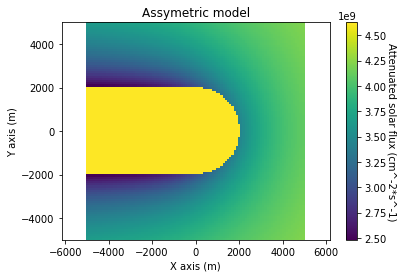

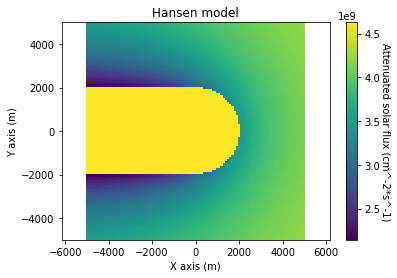

6:80: E501 line too long (95 > 79 characters)
12:1: E305 expected 2 blank lines after class or function definition, found 0


In [10]:
def visualize_a_flux(coma_visualizer, title):
    attenuated_solar_flux = coma_visualizer.attenuated_solar_flux(wavelength)

    plt.pcolormesh(x, y, attenuated_solar_flux)
    colourbar = plt.colorbar()
    colourbar.set_label('Attenuated solar flux (cm^-2*s^-1)', labelpad=10, y=0.5, rotation=270)
    plt.ylabel("Y axis (m)")
    plt.axis('equal')
    plt.xlabel("X axis (m)")
    plt.title(title)
    plt.show()
visualize_a_flux(coma_visualizer, "Assymetric model")
visualize_a_flux(coma_visualizer_hansen, "Hansen model")

## Relative attenuated solar flux

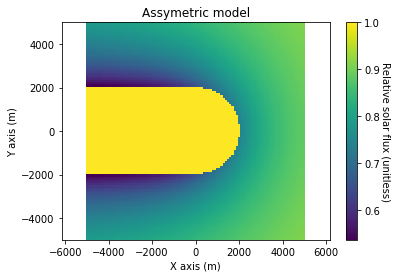

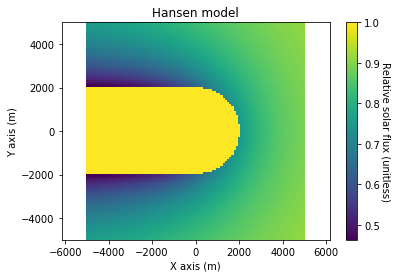

5:80: E501 line too long (91 > 79 characters)
12:1: W293 blank line contains whitespace


In [11]:
def visualize_r_a_flux(coma_visualizer, title):
    optical_depth = coma_visualizer.optical_depth(wavelength)
    plt.pcolormesh(x, y, np.exp(-optical_depth))
    colourbar = plt.colorbar()
    colourbar.set_label('Relative solar flux (unitless)', labelpad=10, y=0.5, rotation=270)
    plt.ylabel("Y axis (m)")
    plt.axis('equal')
    plt.xlabel("X axis (m)")
    plt.title(title)
    plt.show()

    
visualize_r_a_flux(coma_visualizer, "Assymetric model")
visualize_r_a_flux(coma_visualizer_hansen, "Hansen model")

## Electron production rate

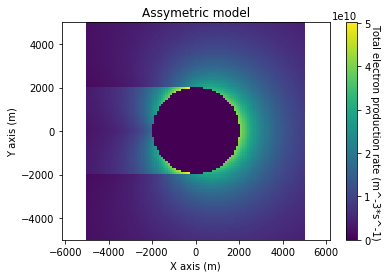

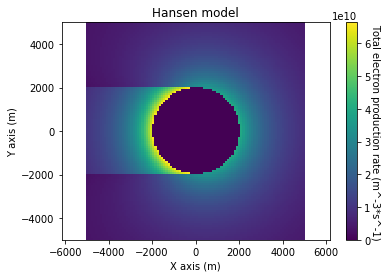

3:80: E501 line too long (89 > 79 characters)
5:29: W291 trailing whitespace
10:80: E501 line too long (103 > 79 characters)
12:1: W293 blank line contains whitespace
13:1: W293 blank line contains whitespace


In [12]:
def visualize_e_p_rate(coma_visualizer, title):
    electron_sources = ['h2o', 'ohp', 'hp', 'op']
    electron_production_rate = coma_visualizer.electron_production_rate(electron_sources)
    plt.pcolormesh(x, y, np.sum(electron_production_rate, axis=0))
    plt.ylabel("Y axis (m)") 
    plt.axis('equal')
    plt.xlabel("X axis (m)")
    plt.title(title)
    colourbar = plt.colorbar()
    colourbar.set_label('Total electron production rate (m^-3*s^-1)', labelpad=10, y=0.5, rotation=270)
    plt.show()
    
    
visualize_e_p_rate(coma_visualizer, "Assymetric model")
visualize_e_p_rate(coma_visualizer_hansen, "Hansen model")

## Wavelentgth optical depth

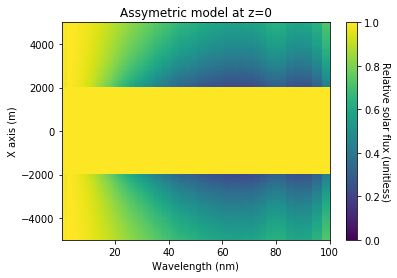

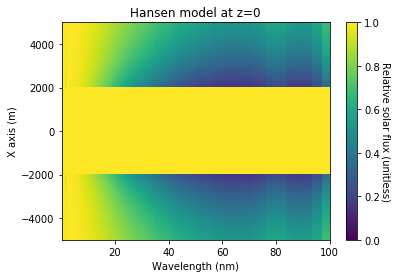

2:1: E302 expected 2 blank lines, found 0
5:80: E501 line too long (88 > 79 characters)
5:89: W291 trailing whitespace
6:50: E127 continuation line over-indented for visual indent
8:80: E501 line too long (91 > 79 characters)
13:1: W293 blank line contains whitespace
14:1: W293 blank line contains whitespace


In [13]:
wavelength = np.linspace(0.1, 100, 2000)
def visualize_optical_d_w(coma_visualizer, title):
    optical_depth = coma_visualizer.optical_depth(wavelength)
    wav_axis, x_axis = np.meshgrid(wavelength, np.linspace(-5000, 5000, 100))
    plt.pcolormesh(wav_axis, x_axis, np.swapaxes(np.exp(-optical_depth[:, :, 0]), 0, 1), 
                                                 vmin=0., vmax=1.)
    colourbar = plt.colorbar()
    colourbar.set_label('Relative solar flux (unitless)', labelpad=10, y=0.5, rotation=270)
    plt.ylabel("X axis (m)")
    plt.xlabel("Wavelength (nm)")
    plt.title(title)
    plt.show()
    
    
visualize_optical_d_w(coma_visualizer, "Assymetric model at z=0")
visualize_optical_d_w(coma_visualizer_hansen, "Hansen model at z=0")

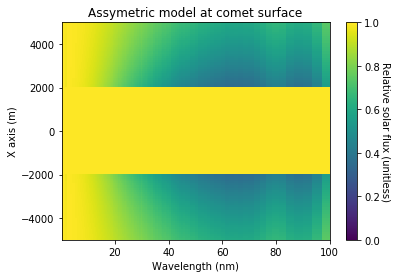

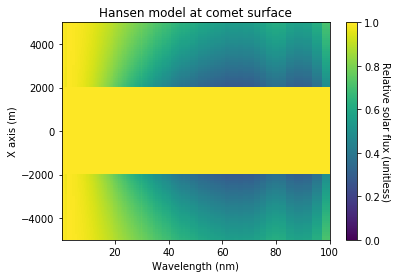

2:80: E501 line too long (93 > 79 characters)
4:80: E501 line too long (82 > 79 characters)


In [14]:
coma_visualizer_2km = Coma_visualizer(coma, 100, 5000, solar_min, h2o_df, 2000)
coma_visualizer_hansen_2km = Coma_visualizer(hansen_coma, 100, 5000, solar_min, h2o_df, 2000)
visualize_optical_d_w(coma_visualizer_2km, "Assymetric model at comet surface")
visualize_optical_d_w(coma_visualizer_hansen_2km, "Hansen model at comet surface")

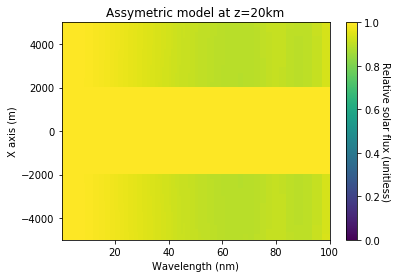

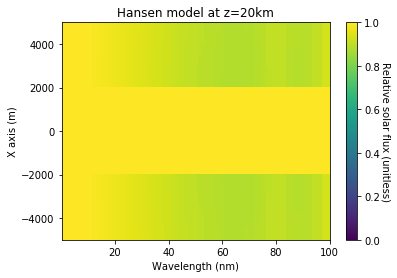

1:80: E501 line too long (81 > 79 characters)
2:80: E501 line too long (95 > 79 characters)


In [15]:
coma_visualizer_20km = Coma_visualizer(coma, 100, 5000, solar_min, h2o_df, 20000)
coma_visualizer_hansen_20km = Coma_visualizer(hansen_coma, 100, 5000, solar_min, h2o_df, 20000)
visualize_optical_d_w(coma_visualizer_20km, "Assymetric model at z=20km")
visualize_optical_d_w(coma_visualizer_hansen_20km, "Hansen model at z=20km")

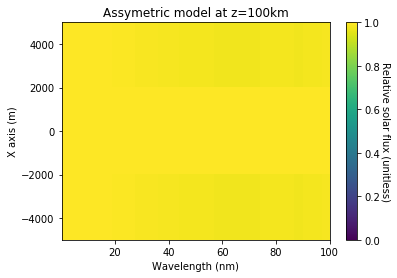

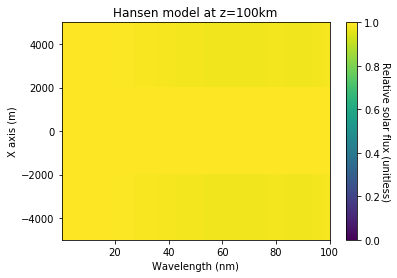

1:80: E501 line too long (83 > 79 characters)
2:80: E501 line too long (97 > 79 characters)


In [16]:
coma_visualizer_100km = Coma_visualizer(coma, 100, 5000, solar_min, h2o_df, 100000)
coma_visualizer_hansen_100km = Coma_visualizer(hansen_coma, 100, 5000, solar_min, h2o_df, 100000)
visualize_optical_d_w(coma_visualizer_100km, "Assymetric model at z=100km")
visualize_optical_d_w(coma_visualizer_hansen_100km, "Hansen model at z=100km")